# Lab 3 – First Neural Network
- Work on saved a copy on your Drive, run ALL the code cells and answer the questions (code or text) before submitting the notebook.
- Try to visualise what each neural network model looks like.

## A. Implementing a basic "forward" pass

In [ ]:
import sys
import matplotlib as plt
import numpy as np
import torch


## The Perceptron (Single Neuron)
- Every non-input NEURON has a bias, not every weight, so the bias is added for a single output neuron
- 1 output neuron with 3 inputs

In [ ]:
# Initialise some values
input = [0.8, 1.3, 2.5]
weights = [2.5, 1.7, -0.5]
bias = 2

# Get the weigthed sum of the inputs and add the bias
output = input[0]*weights[0] + input[1]*weights[1] + input[2]*weights[2] + bias
print(output)

# Add a step function; output is 1 if it is 0 or more, 0 otherwise
output = 1 if output >= 0 else 0

# Print perceptron's final output
print(f'Final perceptron output = {output}') 

# TODO
# Q1. Think of a ML problem or task where a neural network would have a final output to be 0 or 1.
  ## ANSWER: Logistic regression for binary classification(class 0 or class 1), and image detection for find out whether the image has target object or not(0 is for FALSE, 1 is for TRUE).

4.96
Final perceptron output = 1


### Example 2: Multiple neurons
- Each neuron will have its own WEIGHT associated to each input
- As before, each NEURON will have its own BIAS

In [ ]:
#inputs = [0.8, 1.3, 2.5, 2.0] # A sample of 4 features, e.g. temperature, humidity, wind, pressure

input = [0.8, 1.3, 2.5, 2.0]

weights1 = [2.5, 1.7, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [input[0]*weights1[0] + input[1]*weights1[1] + input[2]*weights1[2] + input[3]*weights1[3] + bias1,
          input[0]*weights2[0] + input[1]*weights2[1] + input[2]*weights2[2] + input[3]*weights2[3] + bias2,
          input[0]*weights3[0] + input[1]*weights3[1] + input[2]*weights3[2] + input[3]*weights3[3] + bias3]

print(output)

# TODO
# Q2. How many output neurons does this network contain?
  ## ANSWER: Thin network contains 3 output neurons(as there are 3 biases)

[6.96, 1.867, 2.106]


In [ ]:
torch.Tensor(output)

tensor([6.9600, 1.8670, 2.1060])

### Use Loops and Matrices!




In [ ]:
inputs = [0.8, 1.3, 2.5, 2.0]

weights = [[2.5, 1.7, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_outputs = [] # Outputs of current layer
for weight, bias in zip(weights, biases):
    output = 0 # Reset current neuron output to 0
    for input, w in zip(inputs, weight):
        output += input*w
    output += bias
    layer_outputs.append(output)

print(zip(weights, biases))
print(layer_outputs)

[6.96, 1.867, 2.106]


## Let's use NumPy & Dot Products!
- Multiply elements wise the corresponding values in two arrays and add them up
- Dot product between two vectors results in a single scalar value


In [ ]:
import numpy as np

inputs = np.array([0.8, 1.3, 2.5, 2.0])
weights = np.array([2.5, 1.7, -0.5, 1.0])
bias = 2

output = np.dot(weights, inputs) + bias
print(output)

6.96


When performing a dot product between a vector (input) and a matrix (weights)
  - Weights have to be first parameter of ``np.dot()``, otherwise an error will be thrown
  - Column size of ``weights`` = row size of ``inputs``


In [ ]:
inputs = np.array([0.8, 1.3, 2.5, 2.0])

weights = np.array([[2.5, 1.7, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2, 3, 0.5])

output = np.dot(weights, inputs) + biases # dot product of a vector and a matrix

print(output)

# TODO
# Q3. What else can we do to perform the dot product between the inputs and weights?
  # output = weights @ inputs + biases
  # output = np.dot(inputs, weights.T) + biases

[6.96  1.867 2.106]


## Summary
- Weights and biases are two different tools for approximating something (e.g. an output from an input)
- Weights determine how much influence this input has for the output (as it is multiplied) and bias determines how much this output can be offset by the input (as it is added)
- Think of a classical equation for a line ``y = wx + b`` where ``w`` is the weight and ``b`` is a the bias

## Dot product between two 2-D arrays (two matrices)
- Numpy's ``np.dot()`` is flexible; it computes the inner product for 1D arrays and performs matrix multiplication for 2D arrays.
- Since both matrices have the same size, transpose the second matrix, i.e. ``weights`` here so that ``1st-col-size=2nd-row-size`` holds 


In [ ]:
# inputs 3x4
inputs = np.array([[0.8, 1.3, 2.5, 2.0],
          [2.3, 1.5, 3.8, 4.5],
          [-1.5, 2.7, 3.3, -0.8]])

# weights 3x4
weights = np.array([[2.5, 1.7, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2, 3, 0.5])

output = np.dot(inputs, weights.T) + biases

print(f'{output} \n{output.shape}')

# TODO
# Q4. Explain what it means to have a 2-D array for the input and also for the output
  # 2-D array inputs mean they are multiple data. each input has multiple features(not just one scalar value)
  # Furthermore, 2-D ouputs correspond to inputs, so the ouputs refer to the combined and also extracted features came from inputs and give us the insight what to learn from the inputs.

[[ 6.96   1.867  2.106]
 [12.9    1.523  4.058]
 [ 0.39   1.051  0.026]] 
(3, 3)


## Let's use Tensors!
- ``torch.dot()`` behaves differently to ``np.dot()`` 
- ``torch.dot(a,b)`` treats both ``a`` and ``b`` as 1D vectors (irrespective of their original shape) and computes their inner product.
- Several ways to do matrix (rank 2 tensor) multiplication:
  - ``ab = a.mm(b)``
  - ``ab = torch.mm(a, b)``
  - ``ab = torch.matmul(a, b)``
  - ``ab = a @ b # Python 3.5+``
- The number of columns of the first matrix must be equal to the number of rows of the second matrix.
- The function ``torch.matmul()`` performs matrix multiplications if both arguments are 2D and computes their dot product if both arguments are 1D.


In [ ]:
# 1-D tensor dot product
a = torch.tensor([1, 2])
b = torch.tensor([3, 2])

torch.dot(a, b)

tensor(7)

In [ ]:
# 2-D tensor dot product for matrices with matching column and row size
a = torch.tensor([
    [0, 1, 2],
    [1, 2, 3]
])

b = torch.tensor([
    [0, 1],
    [1, 1],
    [1, 3]
])

torch.mm(a,b)


tensor([[ 3,  7],
        [ 5, 12]])

### Dot product between two 2-D tensors from the example

In [ ]:
input = torch.tensor(inputs)
weight = torch.tensor(weights)
bias = torch.tensor(biases)

output = torch.matmul(input, torch.transpose(weight, 0, 1)) + bias

print(output, output.shape)

# TODO
# Q5. repeat using the @ operator. You should get the same output
# output = weight @ input + bias
# output = input @ torch.transpose(weight, 0, 1) + bias

tensor([[ 6.9600,  1.8670,  2.1060],
        [12.9000,  1.5230,  4.0580],
        [ 0.3900,  1.0510,  0.0260]], dtype=torch.float64) torch.Size([3, 3])


### Exercise: Write your own code using TENSORS to implement a neural network as follows:
- Has 5 input neurons made up of random numbers between 0 and 1
- Connects to two output neurons
- Weights and biases should be random numbers between a normal distribution. Use `torch.randn()`
- The final outputs should be a combination of the weighted sum followed by an activation function as follows:
  - If the weighted sum is negative, then the output is 0
  - Otherwise the output is just the weighted sum


In [ ]:
# Q6. Has 5 input neurons made up of random numbers between 0 and 1. Use torch.rand()
inputs_ex = torch.rand(5)

# Q7. Weights should be random numbers between a normal distribution. Use torch.randn()
weights_ex1 = torch.randn(5, 1)
weights_ex2 = torch.randn(5, 1)

# Q8. Bias should be random numbers between a normal distribution. Use torch.randn()
bias_ex1 = torch.randn(1)
bias_ex2 = torch.randn(1)

# Q9. The final outputs should be a combination of the weighted sum
outputs_ex = torch.Tensor([torch.matmul(torch.transpose(weights_ex1, 0, 1), inputs_ex) + bias_ex1,
              torch.matmul(torch.transpose(weights_ex2, 0, 1), inputs_ex) + bias_ex2])
print(outputs_ex, outputs_ex.shape)

# Q10. If the weighted sum is negative, then the output is 0, otherwise the output is just the weighted sum

def nn_with_activation(input, weight1, weight2, bias1, bias2):
  output_ex = []
  output1 = torch.matmul(torch.transpose(weight1, 0, 1), input) + bias1
  output2 = torch.matmul(torch.transpose(weight2, 0, 1), input) + bias2
  if output1 >= 0:
    output_ex.append(float(output1))
  else:
    output_ex.append(0)
  if output2 >= 0:
    output_ex.append(float(output2))
  else:
    output_ex.append(0)
  output_ex = torch.tensor(output_ex)
  return output_ex

output1 = torch.matmul(inputs_ex, weights_ex1.T) + bias_ex1
output2 = torch.matmul(inputs_ex, weights_ex2.T) + bias_ex2
outputs = [output1, output2]
for i in range(outputs):
  if outputs[i] >= 0:
    outputs[i] = outputs[i]
  else:
    outputs[i] = 0
  return outputs


output_ex = nn_with_activation(inputs_ex, weights_ex1, weights_ex2, bias_ex1, bias_ex2)

# Print out the final output values
print(output_ex, output_ex.shape)

tensor([-2.4454, -0.7729]) torch.Size([2])
tensor([0, 0]) torch.Size([2])


## B. Build NN Model using ``torch.nn.Module``
- Create a subclass of nn.Module
- Define layers and activations
- Do a forward pass to inspect the model, parameters and outputs
- Add loss, optimiser and training loop for linear regression

In [ ]:
import torch

import torch.nn as nn

class TinyModel(nn.Module): # TinyModel is a subclass of nn.Module
    
    def __init__(self):
        super(TinyModel, self).__init__()
        super().__init__()
        self.linear1 = nn.Linear(100, 200) # input_size and hidden_size
        self.activation = nn.ReLU() # Rectified Linear Unit activation function
        self.linear2 = nn.Linear(200, 10) # hidden layer and output layer size
        self.softmax = nn.Softmax() # output layer activation function
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.activation(out)
        out = self.linear2(out)
        out = self.softmax(out)
        return out

# Create an instance of TinyModel (like initalising a variable)
tinymodel = TinyModel()

# See what this model contains
print('The model:')
print(tinymodel)

# Print out one of the layers
print('\n\nJust one layer:')
print(tinymodel.linear2)

# View ALL the parameters (weights and biases)
# print('\n\nModel params:')
# for param in tinymodel.parameters():
#     print(param)

# View the parameters (weights and biases) in the LAST layer (linear2) only
print('\n\nLinear2 layer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=10, bias=True)


Linear2 layer params:
Parameter containing:
tensor([[-0.0170, -0.0101, -0.0674,  ..., -0.0227,  0.0598,  0.0167],
        [ 0.0236, -0.0053, -0.0461,  ..., -0.0619, -0.0278, -0.0429],
        [ 0.0062, -0.0010, -0.0660,  ..., -0.0383,  0.0653, -0.0707],
        ...,
        [ 0.0413, -0.0678, -0.0697,  ...,  0.0177, -0.0175, -0.0504],
        [-0.0332, -0.0198,  0.0652,  ..., -0.0390, -0.0349,  0.0035],
        [ 0.0124,  0.0403, -0.0556,  ..., -0.0194,  0.0047, -0.0326]],
       requires_grad=True)
Parameter containing:
tensor([-0.0119,  0.0402, -0.0656, -0.0597, -0.0095, -0.0523,  0.0609,  0.0483,
        -0.0695,  0.0161], requires_grad=True)


### Linear layer demo

For the code chunk below, note that:
- the weight, bias and output tensor dimensions are as expected (weight matrix is in transposed form, i.e. has shape (out_features, in_features)
- the multiplication of the inputs with the weight matrices, added with the bias will produce the output

In [ ]:
# Create a linear layer with 3 inputs and 2 outputs
lin = torch.nn.Linear(3, 2)
# Create sample input vector with random values
x = torch.rand(1, 3)
print('Input:')
print(x)

# Print the initial parameter values (these are also randomly set)
print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

# Apply the linear layer to the input
y = lin(x)
print('\n\nOutput:')
print(y)


Input:
tensor([[0.0137, 0.7802, 0.8769]])


Weight and Bias parameters:
Parameter containing:
tensor([[ 0.1970,  0.2316,  0.1302],
        [ 0.5642,  0.1836, -0.4587]], requires_grad=True)
Parameter containing:
tensor([0.5408, 0.4702], requires_grad=True)


Output:
tensor([[0.8384, 0.2190]], grad_fn=<AddmmBackward>)


- Note that you see ``requires_grad`` for the parameters. This means that their values will be tracked and used for **gradient** calculation during the training phase.
- Although ``Parameter`` is a subclass of ``Tensor``, it has a special extended behaviour in that its gradients can be tracked for NN learning purposes.


### Add Training Loop, Loss and Optimiser
- A loop is necessary to allow NN training to happen iteratively.
- The number of times we want to repeat the cycle is called number of epochs.
- Loss functions tell us how far a model's prediction is from the correct answer. PyTorch contains a variety of loss functions, including common MSE (mean squared error = L2 norm), Cross Entropy Loss and Negative Likelihood Loss (useful for classifiers), and others.
- An optimiser helps to minimise the loss by taking iterative steps in the direction that minimises the loss by updating the parameters in each epoch. We will use Stochastic Gradient Descent (SGD) for this example.


## Example: Linear Regression
1. Provide training data. We will provide the inputs, ``x`` and outputs, ``y`` for the formula ``y = 3x + 2``. 
  - Remember to provide them as tensors. 
  - Note that ``y`` will have to be correct values that satisfy the formula.
2. Define the NN class. 
  - Since we will only take in a number and also spit out a number, we will have the ``input_size`` to be 1 and the ``output_size`` to be 1 as well. 
  - For linear regression, the output will be a real value, so no output layer activation function is needed.
  - Note also that an extra parameter ``hidden_size`` was added to the initialiser
3. Create an instance of the NN class
  - Pass in the required parameter ``hidden_size``
4. Define Loss and Optimiser
  - for this linear regression problem, we will use the MSE Loss and SGD optimiser
5. Training Loop
  - Loop through a set number of times, e.g. 100
    - forward pass to calculate the predicted values for each input sample and calculate the loss using the loss instance you created earlier
    - backward pass to first reset all the gradients ``opt.zero_grad()``, then to calculate the gradients of the loss w.r.t. the params ``loss.backward()`` and finally update the params accordingly ``opt.step()``

6. Test the model
  - At this point, the model has been trained, i.e. the parameters have been optimised and the loss should be small enough.
  - Call ``model()`` with any new number to test what the trained model will predict. See how accurately it performs.
  - Test with several other numbers.

### NOTES:
- Data will need to be prepared so that it can be used with PyTorch. Here we have specified the data as a tensor and also made sure that it is of type float. 
- It is good practice to specify hyper parameters separately, e.g. ``hidden_size``, ``learning_rate``, ``num_epochs``, etc.


In [ ]:
import torch

import torch.nn as nn


# 1. Define training data for a simple mathematical formula y = 3x + 2 for x=1, ..., 5
x = torch.tensor([[1],[2],[3],[4],[5]], dtype=torch.float32)
y = torch.tensor([[5],[8],[11],[14],[17]], dtype=torch.float32)

# 2. Define NN class 
class MyNN(nn.Module): # TinyModel is a subclass of nn.Module
    
    def __init__(self, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(1, hidden_size) # input_size and hidden_size
        self.activation = nn.ReLU() # Rectified Linear Unit activation function
        self.linear2 = nn.Linear(hidden_size, 1) # hidden layer and output layer size
        # output layer is a real value for regression, does not need any activation
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x

# 3. Create an instance of NN model and define the hidden_size
hidden_size = 4
model = MyNN(hidden_size) # now 'model' will be a callable function

# 4. Loss and Optimiser
learning_rate = 0.01
loss_fn = nn.MSELoss() # now 'loss_fn' will be a callable function
opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 5. Training loop
num_epochs = 100

for epoch in range(num_epochs):
  # 5.1 Forward pass
  y_pred = model(x)
  loss = loss_fn(y_pred, y) 

  # 5.2 Backward pass
  opt.zero_grad() # Reset gradients at each epoch
  loss.backward() # Backpropagate the loss gradients w.r.t the params
  opt.step() # Update params

  # 5.3 Print loss every 10th epoch
  if (epoch+1) % 10 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')


Epoch 10/100, Loss=0.2017 
Epoch 20/100, Loss=0.1502 
Epoch 30/100, Loss=0.1131 
Epoch 40/100, Loss=0.0853 
Epoch 50/100, Loss=0.0645 
Epoch 60/100, Loss=0.0488 
Epoch 70/100, Loss=0.0370 
Epoch 80/100, Loss=0.0281 
Epoch 90/100, Loss=0.0213 
Epoch 100/100, Loss=0.0162 


In [ ]:
# 6. Prediction
# Test the model on any new x
test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)

# Get the model's prediction for this test number
print(f'\n\nModel prediction for {test_num} is {model(test).item():.4f}')



Model prediction for 10 is 32.5225


In [ ]:
# trial for Question 13.
num_epochs = 200

for epoch in range(num_epochs):
  y_pred = model(x)
  loss = loss_fn(y_pred, y) 

  opt.zero_grad()
  loss.backward()
  opt.step()

  if (epoch+1) % 10 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')

test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)

print(f'\n\nModel prediction for {test_num} is {model(test).item():.4f}')

Epoch 10/200, Loss=0.0123 
Epoch 20/200, Loss=0.0094 
Epoch 30/200, Loss=0.0071 
Epoch 40/200, Loss=0.0054 
Epoch 50/200, Loss=0.0041 
Epoch 60/200, Loss=0.0031 
Epoch 70/200, Loss=0.0024 
Epoch 80/200, Loss=0.0018 
Epoch 90/200, Loss=0.0014 
Epoch 100/200, Loss=0.0011 
Epoch 110/200, Loss=0.0008 
Epoch 120/200, Loss=0.0006 
Epoch 130/200, Loss=0.0005 
Epoch 140/200, Loss=0.0004 
Epoch 150/200, Loss=0.0003 
Epoch 160/200, Loss=0.0002 
Epoch 170/200, Loss=0.0002 
Epoch 180/200, Loss=0.0001 
Epoch 190/200, Loss=0.0001 
Epoch 200/200, Loss=0.0001 


Model prediction for 10 is 32.0343


In [ ]:
# trial for Question 14.
hidden_size = 8
model = MyNN(hidden_size)

learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 100

for epoch in range(num_epochs):
  # 5.1 Forward pass
  y_pred = model(x)
  loss = loss_fn(y_pred, y) 

  opt.zero_grad()
  loss.backward()
  opt.step()

  if (epoch+1) % 10 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')

test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)

print(f'\n\nModel prediction for {test_num} is {model(test).item():.4f}')

Epoch 10/100, Loss=0.0683 
Epoch 20/100, Loss=0.0469 
Epoch 30/100, Loss=0.0327 
Epoch 40/100, Loss=0.0227 
Epoch 50/100, Loss=0.0158 
Epoch 60/100, Loss=0.0110 
Epoch 70/100, Loss=0.0077 
Epoch 80/100, Loss=0.0054 
Epoch 90/100, Loss=0.0038 
Epoch 100/100, Loss=0.0026 


Model prediction for 10 is 32.2497


In [ ]:
# TODO
# Q11. Did the loss decrease over time during training?
  # Loss got decreased as training epochs go by.

# Q12. Was the prediction of the model for x=10 close to the ideal value that it should have?
  # The ideal value is 32, and the prediction value is 31.3954.The ratio of residual among ideal value is about 1.9%(for instant trail) so I think it is close enough.

# Q13. Change the num_epochs to 200 and retrain the model. Is the prediction for x=10 better? Why?
  # The prediction got better as it is closer to the ideal value. The reason for that is normally as training complexity increases the loss decreases in training.

# Q14. Set num_epoch=100 and change the hidden_size to 8. Retrain the model. Is the model's performance better?
  # Loss got bigger compared to the previous trial that set epoch=200 and hidden_size=4.

# Q15. Try increasing or decreasing num_epoch and/or hidden_size to see which combination gives you the best model. 
# Keep the output of your code execution above for the best combination and state which combination of num_epoch 
# and hidden_size values gave you the best model.
  # hidden_size=5 / num_epoch=400 was the best.


In [ ]:
hidden_size = 5
model = MyNN(hidden_size)

learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 400

for epoch in range(num_epochs):
  # 5.1 Forward pass
  y_pred = model(x)
  loss = loss_fn(y_pred, y) 

  opt.zero_grad()
  loss.backward()
  opt.step()

  if (epoch+1) % 10 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')

test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)

print(f'\n\nModel prediction for {test_num} is {model(test).item():.4f}')

Epoch 10/400, Loss=0.0432 
Epoch 20/400, Loss=0.0285 
Epoch 30/400, Loss=0.0205 
Epoch 40/400, Loss=0.0147 
Epoch 50/400, Loss=0.0106 
Epoch 60/400, Loss=0.0076 
Epoch 70/400, Loss=0.0055 
Epoch 80/400, Loss=0.0039 
Epoch 90/400, Loss=0.0028 
Epoch 100/400, Loss=0.0020 
Epoch 110/400, Loss=0.0015 
Epoch 120/400, Loss=0.0010 
Epoch 130/400, Loss=0.0008 
Epoch 140/400, Loss=0.0005 
Epoch 150/400, Loss=0.0004 
Epoch 160/400, Loss=0.0003 
Epoch 170/400, Loss=0.0002 
Epoch 180/400, Loss=0.0001 
Epoch 190/400, Loss=0.0001 
Epoch 200/400, Loss=0.0001 
Epoch 210/400, Loss=0.0001 
Epoch 220/400, Loss=0.0000 
Epoch 230/400, Loss=0.0000 
Epoch 240/400, Loss=0.0000 
Epoch 250/400, Loss=0.0000 
Epoch 260/400, Loss=0.0000 
Epoch 270/400, Loss=0.0000 
Epoch 280/400, Loss=0.0000 
Epoch 290/400, Loss=0.0000 
Epoch 300/400, Loss=0.0000 
Epoch 310/400, Loss=0.0000 
Epoch 320/400, Loss=0.0000 
Epoch 330/400, Loss=0.0000 
Epoch 340/400, Loss=0.0000 
Epoch 350/400, Loss=0.0000 
Epoch 360/400, Loss=0.0000 
E

### Let's plot the landscape of the MSE loss over a range of values for weight
- The sample training data has function ``y=3x+2``. However, this relationship is **NOT** known by the model. We only have ``x``'s and ``y``'s.
- So we try different values of weight, ``w``, between -1 and 5 to fit the equation ``y = wx + 2``
- When we do that, we calculate the MSE loss between the predicted outcome, ``pred`` and the actual outcome, ``y`` for each ``w`` that we use.
- The loss that occurred for each weight is plotted and connected.

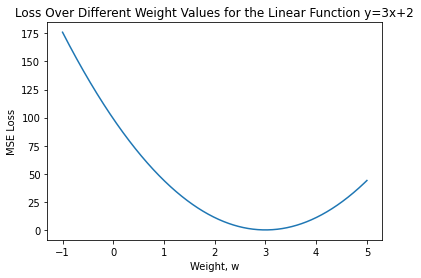

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of values from -1 to 5
w_range = np.linspace(-1, 5, 1000)
loss_w_range = [] # create an empty list to store the loss values

# Try different weight values to get predictions for y
for w in w_range:
    pred = (w * x) + 2
    loss = torch.mean((pred - y) ** 2)
    loss_w_range.append(loss.item())

# Plot the graph
plt.title("Loss Over Different Weight Values for the Linear Function y=3x+2")
plt.plot(w_range, loss_w_range)
plt.xlabel('Weight, w')
plt.ylabel('MSE Loss')
plt.show()


In [ ]:
# Q16. From the graph, what value of weight gives the minimum loss for this linear function?
  # 3 seems to give minimum loss for this model as the gradient of the graph converges to zero at 3 